In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#data to read in 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_guan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_guch = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_nong = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_shun = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
df_tian = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

In [3]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove
#features: year, month, day, and hour

def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [4]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_guan = set_datetime(df_guan)
df_guch = set_datetime(df_guch)
df_huai = set_datetime(df_huai)
df_nong = set_datetime(df_nong)
df_shun = set_datetime(df_shun)
df_tian = set_datetime(df_tian)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [5]:
#value_counts() on wd - wind direction 
print('Changping Station:')
display(df_chang['wd'].value_counts())
display(df_chang['wd'].nunique())

Changping Station:


NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

16

Each station has 16 unique `wd` (wind direction) values:
- N: north
- NW: north west
- NNW: north north west
- NE: north east
- NNE: north north east
---
- S: south 
- SW: south west
- SSW: south south west
- SE: south east
- SSE: south south east
---
- E: east
- ENE: east north east
- ESE: east south east
---
- W: west
- WNW: west north west
- WSW: west south west

In [6]:
#resampling to daily average because stakeholder only wants day by day forecasting
df_chang_avg = df_chang.resample('D').mean()
df_dong_avg = df_dong.resample('D').mean()
df_guan_avg = df_guan.resample('D').mean()
df_guch_avg = df_guch.resample('D').mean()
df_huai_avg = df_huai.resample('D').mean()
df_nong_avg = df_nong.resample('D').mean()
df_shun_avg = df_shun.resample('D').mean()
df_tian_avg = df_tian.resample('D').mean()
df_wanl_avg = df_wanl.resample('D').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-01,12.5,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,36.5,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,60.5,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,84.5,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,108.5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      1461 non-null   float64
 1   PM2.5   1450 non-null   float64
 2   PM10    1454 non-null   float64
 3   SO2     1457 non-null   float64
 4   NO2     1457 non-null   float64
 5   CO      1449 non-null   float64
 6   O3      1457 non-null   float64
 7   TEMP    1461 non-null   float64
 8   PRES    1461 non-null   float64
 9   DEWP    1461 non-null   float64
 10  RAIN    1461 non-null   float64
 11  WSPM    1461 non-null   float64
dtypes: float64(12)
memory usage: 148.4 KB


None

Before resampling had 35,064 entries now with taking the daily average have gone down to 1,461 observations. This makes sense there was 24 entries per day, and now it has only one. Not very ideal for time series but if it performs badly will go back to hourly.

In [7]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_guan_avg, df_guch_avg, df_huai_avg, df_nong_avg, 
         df_shun_avg, df_tian_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#NO2
print('NO2 null values')   
for df in df_list:
    print(df['NO2'].isna().sum().sum())

Total null values:
42
161
61
41
71
19
95
34
86


NO2 null values
4
44
5
3
11
2
19
3
22


The total nulls for the station are all fairly low, the highest being 161 - Dongsi station located in the Dongsheng District (Beijing city center). 11% of the data is missing for Dongsi. The second highest is Shunyi station located in Shunyi District with 95 total missing values. 6.5% of the data is missing. 

The NO2 null values are also low, the highest being 44, once again the Dongsi station. 3% of the total data and 27.3% of the missing data. The second highest is Wanliu station located in Haidan District with 22 missing. 1.5% of the total data and 25.6% of its missing data. 

The station with the lowest missing values are Tiantan with 34 total and Nongzhanguan 2 NO2.

In [9]:
#.describe() on all stations
print("Changping Station:")
display(df_chang_avg['PM10'].describe()) 

print("Dongsi Station:")
display(df_dong_avg['PM10'].describe())

print("Guanyan Station:")
display(df_guan_avg['PM10'].describe())

print("Gucheng Station:")
display(df_guch_avg['PM10'].describe())

print("Huairou Station:")
display(df_huai_avg['PM10'].describe())

print("Nongzhanguan Station:")
display(df_nong_avg['PM10'].describe())

print("Shunyi Station:")
display(df_shun_avg['PM10'].describe())

print("Tiantan Station:")
display(df_tian_avg['PM10'].describe())

print("Wanliu Station:")
display(df_wanl_avg['PM10'].describe())

Changping Station:


count    1454.000000
mean       94.707382
std        67.917777
min         5.625000
25%        43.343750
50%        79.312500
75%       124.520833
max       482.750000
Name: PM10, dtype: float64

Dongsi Station:


count    1457.000000
mean      110.351618
std        80.328873
min         4.833333
25%        51.500000
50%        90.750000
75%       142.583333
max       584.666667
Name: PM10, dtype: float64

Guanyan Station:


count    1459.000000
mean      109.115466
std        75.066997
min         7.291667
25%        53.604167
50%        93.500000
75%       141.812500
max       555.416667
Name: PM10, dtype: float64

Gucheng Station:


count    1461.000000
mean      119.080492
std        75.938479
min         6.333333
25%        61.708333
50%       106.708333
75%       154.083333
max       564.666667
Name: PM10, dtype: float64

Huairou Station:


count    1450.000000
mean       91.515915
std        66.163801
min         5.208333
25%        41.218750
50%        76.583333
75%       124.333333
max       506.708333
Name: PM10, dtype: float64

Nongzhanguan Station:


count    1460.000000
mean      109.297843
std        78.455562
min         7.391304
25%        51.568182
50%        90.520833
75%       141.010417
max       520.217391
Name: PM10, dtype: float64

Shunyi Station:


count    1460.000000
mean       98.872346
std        70.702200
min         5.000000
25%        44.739583
50%        81.853261
75%       131.504167
max       515.333333
Name: PM10, dtype: float64

Tiantan Station:


count    1461.000000
mean      106.332842
std        73.340129
min         7.208333
25%        52.625000
50%        88.708333
75%       137.083333
max       537.125000
Name: PM10, dtype: float64

Wanliu Station:


count    1461.000000
mean      110.559175
std        75.717807
min         6.333333
25%        53.125000
50%        93.875000
75%       142.416667
max       514.375000
Name: PM10, dtype: float64

The Gucheng station has the highest PM10 (particulate matter) in mean and median. The Dongsi Station has the highest max value at 584.67. All of the max values for each station are quite high/far away from the 75th percentile; therefore, in the preprocessing step will use the median for the null values.

## Distribution of PM10

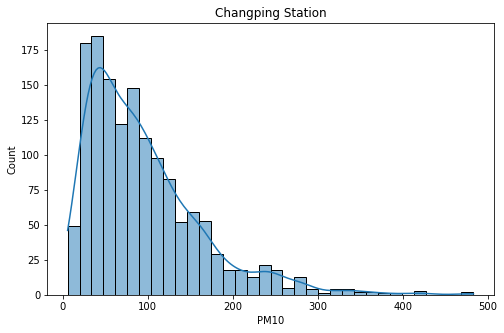

In [10]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='PM10', kde=True)
plt.title("Changping Station");

Changping has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

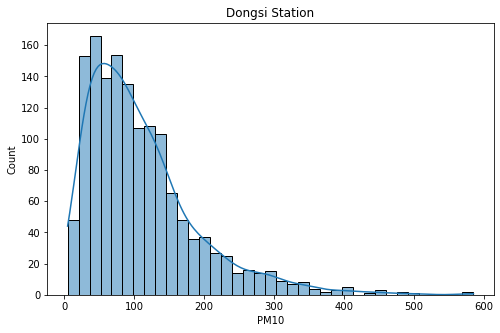

In [11]:
#histogram for Dongsi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_dong_avg, x='PM10', kde=True)
plt.title("Dongsi Station");

Dongsi has a right (positive) skewed distribution with bulk of PM10 being within 5 to 250 range; trailing off to 600.

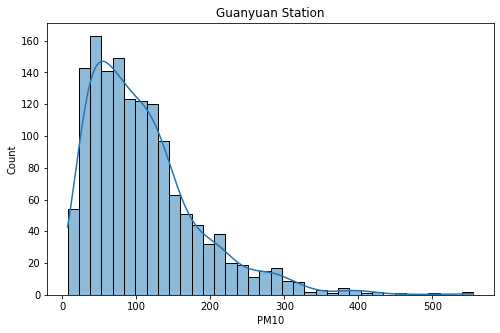

In [12]:
#histogram for Guanyuan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guan_avg, x='PM10', kde=True)
plt.title("Guanyuan Station");

Guanyuan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 250 range; trailing off to 500.

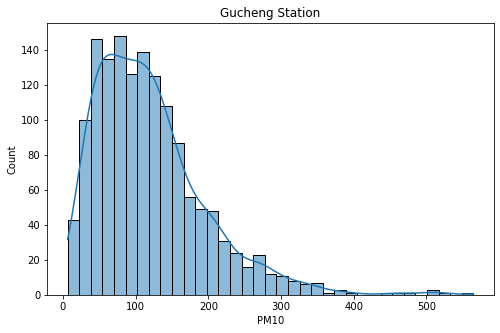

In [13]:
#histogram for Gucheng Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guch_avg, x='PM10', kde=True)
plt.title("Gucheng Station");

Gucheng has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

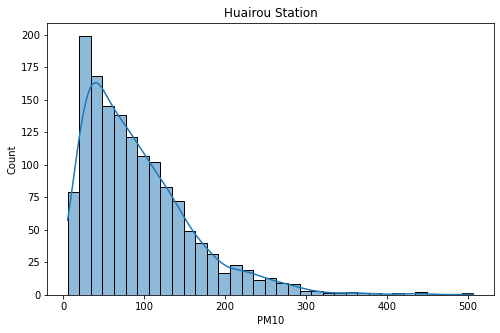

In [14]:
#histogram for Huairou Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_huai_avg, x='PM10', kde=True)
plt.title("Huairou Station");

Huairou has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

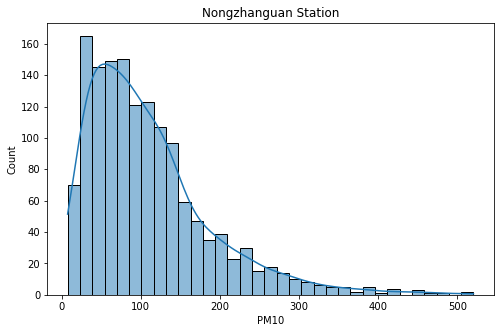

In [15]:
#histogram for Nongzhanguan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_nong_avg, x='PM10', kde=True)
plt.title("Nongzhanguan Station");

Nongzhanguan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

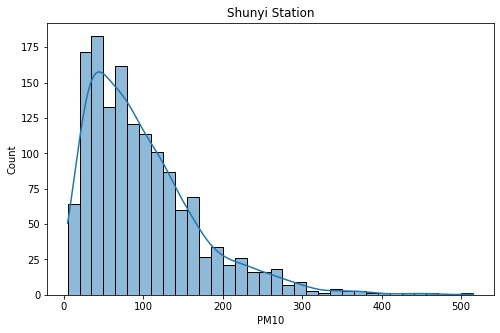

In [16]:
#histogram for Shunyi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_shun_avg, x='PM10', kde=True)
plt.title("Shunyi Station");

Shunyi has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

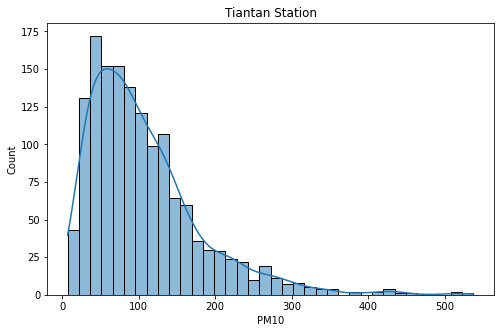

In [17]:
#histogram for Tiantan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_tian_avg, x='PM10', kde=True)
plt.title("Tiantan Station");

Tiantan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

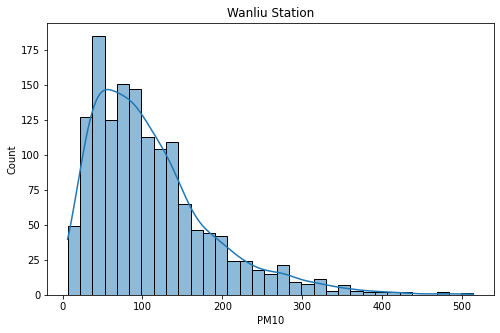

In [18]:
#histogram for Wanliu Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_wanl_avg, x='PM10', kde=True)
plt.title("Wanliu Station");

Wanliu has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

## Line Plots of NO2

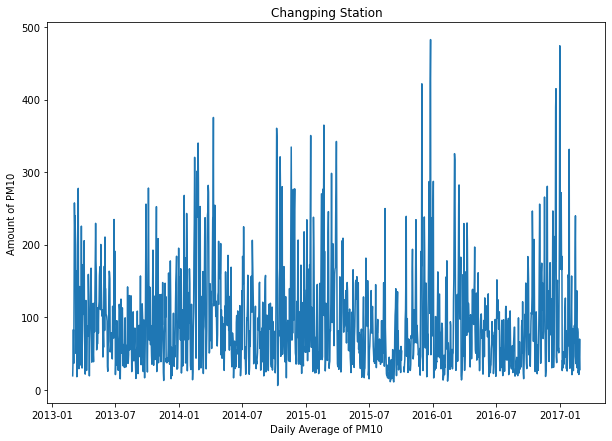

In [19]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Changping Station");

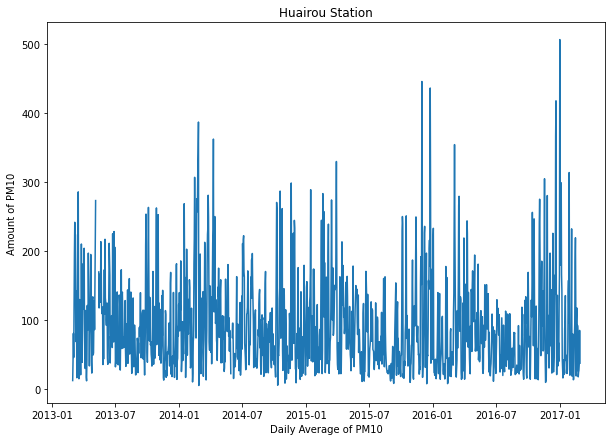

In [20]:
#lineplot for Huairou Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_huai_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Huairou Station");

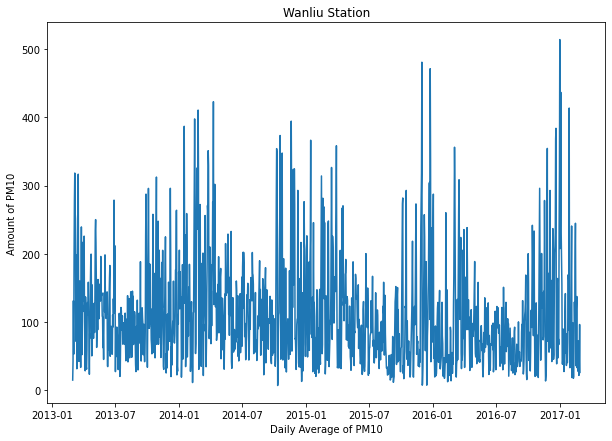

In [21]:
#lineplot for Wanliu Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_wanl_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Wanliu Station");

- There are no obvious patterns in the PM10 timer series plot for any station.
- There does not appear to be a general trend increasong or decreasing.
- There may be some seasonal variation where it seems to be some spikes at the beginning of some years like 2016 and 2017. 

## Changping Station

### Train/Test Split

In [22]:
#having the full df for reference
df_chang_avg.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-01,12.5,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,36.5,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,60.5,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,84.5,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,108.5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


In [23]:
# find the index which allows us to split off 20% of the data
cutoff = round(df_chang_avg.shape[0]*0.8)
cutoff

1169

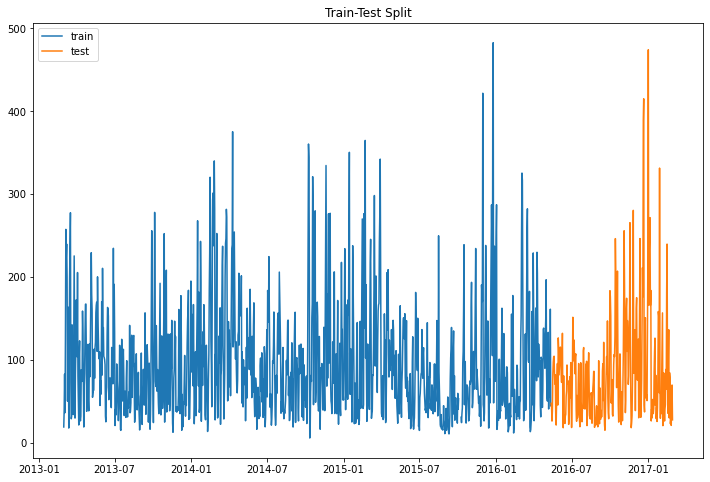

In [24]:
train_chang = df_chang_avg[:cutoff]

test_chang = df_chang_avg[cutoff:]

#plotting train test split
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_chang['PM10'], label='train')
ax.plot(test_chang['PM10'], label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [25]:
#checking null values 
train_chang.isna().sum()

No        0
PM2.5    11
PM10      7
SO2       4
NO2       4
CO       12
O3        4
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [26]:
#locating the missing values of target variable - NO2
train_chang.loc[train_chang['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2014-04-27,10140.5,NaN,NaN,NaN,NaN,NaN,NaN,18.754167,1011.141667,2.237500,0.0,2.012500
2014-04-28,10164.5,NaN,NaN,NaN,NaN,NaN,NaN,19.512500,1009.616667,3.858333,0.0,1.670833
2015-10-05,22764.5,NaN,NaN,8.291667,50.250000,1408.333333,98.750000,18.200000,1009.620833,12.912500,0.0,1.200000
2015-10-06,22788.5,NaN,NaN,5.833333,60.833333,1545.833333,98.833333,19.225000,1007.666667,13.983333,0.0,1.237500
2015-10-07,22812.5,NaN,NaN,5.166667,68.111111,1794.444444,66.666667,19.700000,1005.754167,11.841667,0.0,1.479167
2015-10-08,22836.5,NaN,NaN,NaN,NaN,NaN,NaN,15.041667,1010.525000,-4.995833,0.0,2.958333
2015-10-09,22860.5,NaN,NaN,NaN,NaN,NaN,NaN,14.745833,1002.533333,-4.208333,0.0,3.591667


In [27]:
#imputing the missing values with the median
train_chang = train_chang.fillna(train_chang.median())

In [28]:
train_chang.loc[train_chang['No'] == 10140.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2014-04-27,10140.5,54.25,81.125,8.75,37.833333,850.0,53.416667,18.754167,1011.141667,2.2375,0.0,2.0125


This median value for PM10 is different than before because it takes the median of the train data not the full data like before.

### Checking for Stationarity

In [29]:
#dickey-fuller test
from statsmodels.tsa.stattools import adfuller

#autolag set to AIC to minimize it
chang_dft = adfuller(train_chang['PM10'], autolag='AIC')
output_chang = pd.Series(chang_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_chang

test statistic           -9.395946e+00
pvalue                    6.374118e-16
number of lags used       7.000000e+00
number of observations    1.161000e+03
dtype: float64

The p-value for the aure quality is less than significance level of 0.05. The null hypothesis is rejected in favor of the alternative hypothesis which states that the dataset is stationary and its time series properties are constant over time.

### Baseline Model

In [30]:
base_chang = train_chang['PM10'].shift(1)

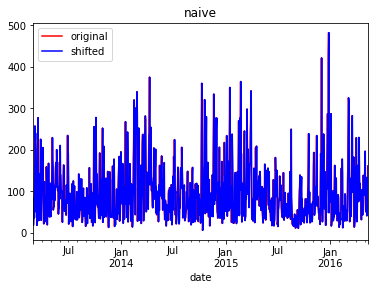

In [35]:
fig, ax = plt.subplots()

train_chang.PM10.plot(ax=ax, c='r', label='original')
base_chang.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

### First Simple Model - AR

In [40]:
from statsmodels.tsa.ar_model import AutoReg

ar_chang = AutoReg(train_chang['PM10'], lags=7).fit()


/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [41]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [43]:
print(out.format(ar_chang.aic, ar_chang.hqic, ar_chang.bic))

AIC: 8.081, HQIC: 8.096, BIC: 8.121
